In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import gseapy as gp
sns.set_context("notebook", rc={"lines.linewidth": 2})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [8]:
cate = "primaryNivo"
ano = ".negative."
df = pd.read_csv(f"{cate}{ano}_os_significant_nodes_by_connectivity.txt")
df1 = pd.read_csv(f"{cate}{ano}_pfs_significant_nodes_by_connectivity.txt")
gene_list = list(set(df[df["p"]<0.01]["covariate"].tolist() + df1[df1["p"]<0.01]["covariate"].tolist()))
df[df["p"]<0.01]["covariate"]
print(len(df[df["p"]<0.01]["covariate"].tolist()))
print(len(df1[df1["p"]<0.01]["covariate"].tolist()))

229
108


In [9]:
interlist = list(set(df[df["p"]<0.01]["covariate"]).intersection(df1[df1["p"]<0.01]["covariate"].tolist()))
len(list(set(df[df["p"]<0.01]["covariate"]).union(df1[df1["p"]<0.01]["covariate"].tolist())))


289

In [10]:
len(set(gene_list))

289

In [11]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list , # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human','CellMarker_Augmented_2021'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 cutoff=0.9,
                 outdir=f"./{cate}{ano}", # don't write to disk
                )



/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:671: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:671: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:671: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/c

enr.results.head(10)

In [12]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Oxidative Phosphorylation,15/200,2.325280e-07,0.000009,0,0,5.778063,88.255604,COX7B;ACADVL;NDUFA6;MAOB;UQCRB;NDUFA5;NDUFB4;N...
1,MSigDB_Hallmark_2020,Myc Targets V1,11/200,1.648429e-04,0.003214,0,0,4.087054,35.600357,CCT2;RSL1D1;HDDC2;LDHA;YWHAQ;CBX3;RPL34;VDAC1;...
2,MSigDB_Hallmark_2020,Fatty Acid Metabolism,7/158,8.203487e-03,0.106645,0,0,3.215443,15.444404,LDHA;ACADVL;ACADL;ALDH1A1;SMS;NBN;S100A10
3,MSigDB_Hallmark_2020,p53 Pathway,7/200,2.656667e-02,0.259025,0,0,2.510308,9.107642,LDHB;HINT1;CCNG1;DNTTIP2;RPS27L;TM7SF3;S100A10
4,MSigDB_Hallmark_2020,Reactive Oxygen Species Pathway,3/49,3.377084e-02,0.263413,0,0,4.484266,15.193399,NDUFA6;NDUFB4;GSR
...,...,...,...,...,...,...,...,...,...,...
726,CellMarker_Augmented_2021,Astrocyte:Brain,1/164,9.090027e-01,0.916609,0,0,0.416411,0.039729,IL11RA
727,CellMarker_Augmented_2021,CD1C-CD141- Dendritic cell:Blood,2/314,9.433098e-01,0.949218,0,0,0.433284,0.025287,NLRP1;ITM2B
728,CellMarker_Augmented_2021,Retinoid Acid Signaling-Responsive Fetal Germ ...,1/219,9.594500e-01,0.963448,0,0,0.310477,0.012852,REC8
729,CellMarker_Augmented_2021,Mitotic Arrest Phase Fetal Germ cell:Fetal Gonad,7/948,9.852854e-01,0.987334,0,0,0.495135,0.007340,PACS2;SYPL1;ZFR2;SMS;TSC2;BAZ1A;SLU7


/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:671: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:671: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


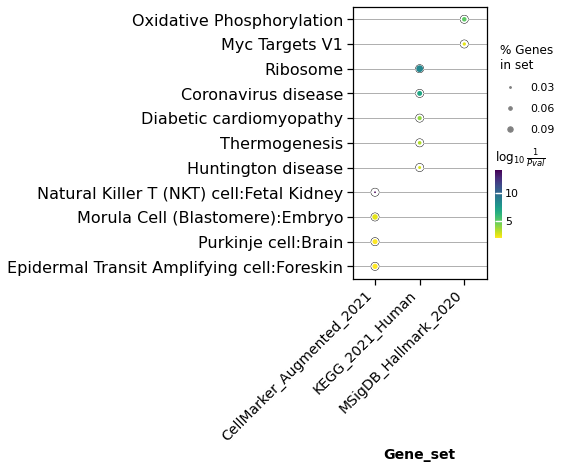

In [13]:
from gseapy import barplot, dotplot
import scienceplots
plt.rc('font', family='DejaVu Sans')

ax = dotplot(enr.results,
              column="Adjusted P-value",#vAdjusted 
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
             thresh=0.8,
              figsize=(3,5),
              xticklabels_rot=45, # rotate xtick labels
             yticklabels_rot=0,
              show_ring=True, # set to False to revmove outer ring
              marker='o')

plt.savefig(f"f3.{cate}{ano}_ora_genes.svg",dpi=600,bbox_inches='tight')
plt.savefig(f"f3.{cate}{ano}_ora_genes.tif",dpi=600,bbox_inches='tight')

In [ ]:
ax = barplot(enr.results,
              column="P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkblue'] # set colors for group
             ,cutoff = 0.05
             )